In [1]:
import pandas as pd
import numpy as np

## Load in Data

In [45]:
# data_filepath='resume_assessment.csv'
data_filepath = 'resume_assessment_long_format_gpt4o_temp1_interview.csv'
# data_filepath = 'resume_assessment_long_format_gpt4o_name_v1_jobs_v1.csv'

In [46]:
df = pd.read_csv(data_filepath)

# prompt_type='interview'

# df = df[
#     (df["prompt"] == prompt_type) &
#     (df["value"].notnull()) &
#     (df["value"] > 0) & 
#     (df["name"] == 'Keisha Towns') | (df["name"] == 'Jermaine Jackson') | (df["name"] == 'Katie Burns') | (df["name"] == 'Peter Hughes')  # Filter for specific  names
# ].copy()


In [31]:

# Define levels
gender_levels = ["men", "women"]
race_levels = ["white", "hispanic", "asian", "black"]

# Aggregate sum of 'value' by race and gender
agg = df.groupby(['race', 'gender'])['value'].sum().reset_index()

# Calculate overall sum of 'value'
total_value = agg['value'].sum()

# Calculate probability of being hired per group
agg['prob'] = agg['value'] / total_value

# Create a function to get probability for a group
def get_prob(race, gender):
    row = agg[(agg['race'] == race) & (agg['gender'] == gender)]
    if not row.empty:
        return row['prob'].values[0]
    else:
        return 0

# Reference groups
ref_gender = 'men'
ref_race = 'white'

# Probability for reference groups
prob_ref_gender = agg[agg['gender'] == ref_gender]['prob'].sum()
prob_ref_race = agg[agg['race'] == ref_race]['prob'].sum()
prob_ref_combined = get_prob(ref_race, ref_gender)

# Compute relative probabilities

# 1. Female vs Male (all races)
prob_women = agg[agg['gender'] == 'women']['prob'].sum()
prob_men = agg[agg['gender'] == 'men']['prob'].sum()
rel_prob_female_vs_male = prob_women / prob_men if prob_men else None

# 2. Hispanic vs White (all genders)
prob_hispanic = agg[agg['race'] == 'hispanic']['prob'].sum()
prob_white = agg[agg['race'] == 'white']['prob'].sum()
rel_prob_hispanic_vs_white = prob_hispanic / prob_white if prob_white else None

# 3. Asian vs White (all genders)
prob_asian = agg[agg['race'] == 'asian']['prob'].sum()
rel_prob_asian_vs_white = prob_asian / prob_white if prob_white else None

# 4. Black vs White (all genders)
prob_black = agg[agg['race'] == 'black']['prob'].sum()
rel_prob_black_vs_white = prob_black / prob_white if prob_white else None

# 5. Black women vs White men
prob_black_women = get_prob('black', 'women')
prob_white_men = get_prob('white', 'men')
rel_prob_black_women_vs_white_men = prob_black_women / prob_white_men if prob_white_men else None

# Print reference probabilities (rounded to 2 decimal places)
print("Probability female:", round(prob_women, 4))
print("Probability male:", round(prob_men, 4))
print("Probability white:", round(prob_white, 4))
print("Probability hispanic:", round(prob_hispanic, 4))
print("Probability asian:", round(prob_asian, 4))
print("Probability black:", round(prob_black, 4))

# Print results (rounded to 4 decimal places)
print("Relative probability female vs male:", round(rel_prob_female_vs_male, 4))
print("Relative probability hispanic vs white:", round(rel_prob_hispanic_vs_white, 4))
print("Relative probability asian vs white:", round(rel_prob_asian_vs_white, 4))
print("Relative probability black vs white:", round(rel_prob_black_vs_white, 4))
print("Relative probability black women vs white men:", round(rel_prob_black_women_vs_white_men, 4))


Probability female: 0.4006
Probability male: 0.3999
Probability white: 0.1999
Probability hispanic: 0.2001
Probability asian: 0.2004
Probability black: 0.2001
Relative probability female vs male: 1.0019
Relative probability hispanic vs white: 1.001
Relative probability asian vs white: 1.0022
Relative probability black vs white: 1.0011
Relative probability black women vs white men: 1.0037


In [32]:
subset = df[df['variable'] == var]
min(subset['value'])

NameError: name 'var' is not defined

In [33]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0) & 
    (df["name"] == 'Keisha Towns') | (df["name"] == 'Jermaine Jackson') | (df["name"] == 'Katie Burns') | (df["name"] == 'Peter Hughes')  # Filter for specific  names
].copy()


# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]


# Use df_filtered which is already filtered for baseline and value in [0, 100]
plt.figure(figsize=(8, 4))
plt.hist(
    [df_filtered[df_filtered['gender'] == 'women']['value'], df_filtered[df_filtered['gender'] == 'men']['value']],
    bins=range(50, 101),
    label=['Women', 'Men'],
    alpha=0.7,
    edgecolor='black'
)
plt.title('Histogram of value for Women and Men')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.ylim(0, 1000)
plt.xticks(range(50, 101, 5))
plt.legend()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'resume_assessment_long_format_gpt4o_name_v1_jobs_v1.csv'

In [34]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)


df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0)
].copy()
# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]


# Use df_filtered which is already filtered for baseline and value in [0, 100]
plt.figure(figsize=(8, 4))
plt.hist(
    [df_filtered[df_filtered['race'] == 'white']['value'], df_filtered[df_filtered['race'] == 'hispanic']['value']],    
    bins=range(50, 101),
    label=['White', 'Hispanic'],
    alpha=0.7,
    edgecolor='black'
)
plt.title('Histogram of value for White and Hispanic')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.ylim(0, 2500)
plt.xticks(range(50, 101, 5))
plt.legend()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'resume_assessment_long_format_gpt4o_name_v1_jobs_v1.csv'

In [35]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)


df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0)
].copy()
# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]


# Use df_filtered which is already filtered for baseline and value in [0, 100]
plt.figure(figsize=(8, 4))
plt.hist(
    [df_filtered[df_filtered['race'] == 'white']['value'], df_filtered[df_filtered['race'] == 'asian']['value']],    
    bins=range(50, 101),
    label=['White', 'Asian'],
    alpha=0.7,
    edgecolor='black'
)
plt.title('Histogram of value for White and Asian')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.ylim(0, 2500)
plt.xticks(range(50, 101, 5))
plt.legend()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'resume_assessment_long_format_gpt4o_name_v1_jobs_v1.csv'

In [36]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0) & 
    (df["name"] == 'Keisha Towns') | (df["name"] == 'Jermaine Jackson') | (df["name"] == 'Katie Burns') | (df["name"] == 'Peter Hughes')  # Filter for specific  names
].copy()



# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]


# Use df_filtered which is already filtered for baseline and value in [0, 100]
plt.figure(figsize=(8, 4))
plt.hist(
    [df_filtered[df_filtered['race'] == 'white']['value'], df_filtered[df_filtered['race'] == 'black']['value']],    
    bins=range(50, 101),
    label=['White', 'Black'],
    alpha=0.7,
    edgecolor='black'
)
plt.title('Histogram of value for White and Black')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.ylim(0, 1600)
plt.xticks(range(50, 101, 5))
plt.legend()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'resume_assessment_long_format_gpt4o_name_v1_jobs_v1.csv'

In [37]:
import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)

prompt_type = 'interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0)
].copy()

# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]

groups = [
    ('gender', 'women'),
    ('gender', 'men'),
    ('race', 'white'),
    ('race', 'asian'),
    ('race', 'black'),
    ('race', 'hispanic')
]

fig, axes = plt.subplots(len(groups), 1, figsize=(8, 4 * len(groups)), sharex=True)

if len(groups) == 1:
    axes = [axes]

for ax, (col, group) in zip(axes, groups):
    subset = df_filtered[df_filtered[col] == group]
    ax.hist(subset['value'], bins=range(0, 10), alpha=0.7, edgecolor='black')
    ax.set_title(f'Histogram of value for {group}')
    ax.set_xlabel('value')
    ax.set_ylabel('Frequency')
    # set the y axis to be 0 to 2500 
    ax.set_ylim(0, 2500)
    ax.set_xticks(range(0, 101, 5))

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'resume_assessment_long_format_gpt4o_name_v1_jobs_v1.csv'

In [38]:
# Initialize lists to store impact ratios for each threshold
woman_ir_list = []
hispanic_ir_list = []
asian_ir_list = []
black_ir_list = []

for thresholdvalue in np.arange(0.0, 1.0, 0.001):
    threshold = df['value'].quantile(1-thresholdvalue)
    df['selected'] = (df['value'] >= threshold).astype(int)

    gender_rates = df.groupby('gender')['selected'].mean()
    race_rates = df.groupby('race')['selected'].mean()

    # Store impact ratios for each group
    if 'women' in gender_rates and 'men' in gender_rates and gender_rates['men'] != 0:
        woman_ir_list.append(float(gender_rates['women']) / float(gender_rates['men']))
    else:
        woman_ir_list.append(0)

    if 'hispanic' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        hispanic_ir_list.append(float(race_rates['hispanic']) / float(race_rates['white']))
    else:
        hispanic_ir_list.append(0)

    if 'asian' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        asian_ir_list.append(float(race_rates['asian']) / float(race_rates['white']))
    else:
        asian_ir_list.append(0)

    if 'black' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        black_ir_list.append(float(race_rates['black']) / float(race_rates['white']))
    else:
        black_ir_list.append(0)


In [39]:
black_ir_list

[1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 1.4999999999999998,
 2.3636363636363638,
 2.3636363636363638,
 2.3636363636363638,
 2.3636363636363638,
 2.3636363636363638,
 2.3636363636363638,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827586208,
 1.4310344827

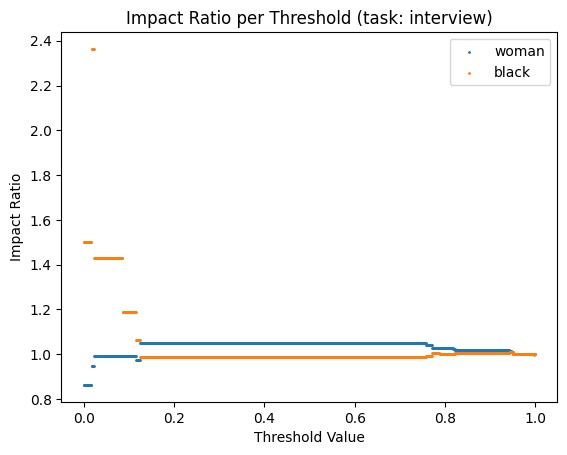

In [40]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(0.0, 1.0, 0.001), woman_ir_list, label='woman', s=1)
# plt.scatter(np.arange(0.0, 1.0, 0.001), hispanic_ir_list, label='hispanic', s=1)
# plt.scatter(np.arange(0.0, 1.0, 0.001), asian_ir_list, label='asian', s=1)
plt.scatter(np.arange(0.0, 1.0, 0.001), black_ir_list, label='black', s=1)
plt.xlabel('Threshold Value')
plt.ylabel('Impact Ratio')
plt.legend()
plt.title('Impact Ratio per Threshold (task: {})'.format(prompt_type))
# save the plot
plt.savefig('figs/impact_ratio_per_threshold_{}.png'.format(prompt_type))

In [41]:
gender_rates['women']

np.float64(1.0)

In [42]:
# Initialize lists to store impact ratios for each threshold
woman_or_list = []
hispanic_or_list = []
asian_or_list = []
black_or_list = []

df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0) & 
    (df["name"] == 'Keisha Towns') | (df["name"] == 'Jermaine Jackson') | (df["name"] == 'Katie Burns') | (df["name"] == 'Peter Hughes')  # Filter for specific  names
].copy()





def or_func(p_a):
    return p_a / (1 - p_a)

for thresholdvalue in np.arange(0.0, 1.0, 0.001):
    threshold = df['value'].quantile(1-thresholdvalue)
    df['selected'] = (df['value'] >= threshold).astype(int)

    gender_rates = df.groupby('gender')['selected'].mean()
    race_rates = df.groupby('race')['selected'].mean()

    # Store impact ratios for each group
    if 'women' in gender_rates and 'men' in gender_rates and gender_rates['men'] != 0:
        woman_or_list.append(or_func(float(gender_rates['women'])) / or_func(float(gender_rates['men'])))
    else:
        woman_or_list.append(0)

    # if 'hispanic' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
    #     hispanic_or_list.append(or_func(float(race_rates['hispanic']) / float(race_rates['white'])))
    # else:
    #     hispanic_or_list.append(0)

    # if 'asian' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
    #     asian_or_list.append(or_func(float(race_rates['asian']) / or_func(float(race_rates['white']))))
    # else:
    #     asian_or_list.append(0)

    # if 'black' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
    #     black_or_list.append(or_func(float(race_rates['black']) / or_func(float(race_rates['white']))))
    # else:
    #     black_or_list.append(0)

FileNotFoundError: [Errno 2] No such file or directory: 'resume_assessment_long_format_gpt4o_name_v1_jobs_v1.csv'

ValueError: x and y must be the same size

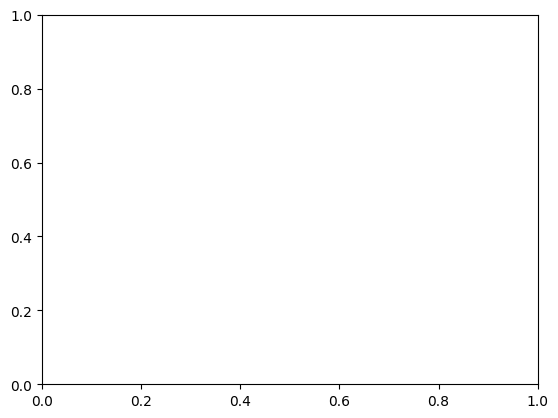

In [43]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(0.0, 1.0, 0.001), woman_or_list, label='woman', s=1)
# plt.scatter(np.arange(0.0, 1.0, 0.001), hispanic_or_list, label='hispanic', s=1)
# plt.scatter(np.arange(0.0, 1.0, 0.001), asian_or_list, label='asian', s=1)
# plt.scatter(np.arange(0.0, 1.0, 0.001), black_or_list, label='black', s=1)
plt.xlabel('Threshold Value')
plt.ylabel('Impact Ratio')
plt.legend()
plt.title('Impact Ratio per Threshold (task: {})'.format(prompt_type))
# save the plot
plt.savefig('figs/impact_ratio_per_threshold_{}.png'.format(prompt_type))

In [44]:
from scipy.stats import wasserstein_distance
df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0) & 
    (df["name"] == 'Keisha Towns') | (df["name"] == 'Jermaine Jackson') | (df["name"] == 'Katie Burns') | (df["name"] == 'Peter Hughes')  # Filter for specific  names
].copy()



df_filtered = df


# Compute Wasserstein distance between men and women
values_men = df_filtered[df_filtered['gender'] == 'men']['value']
values_women = df_filtered[df_filtered['gender'] == 'women']['value']
wd_gender = wasserstein_distance(values_men, values_women)

# # Compute Wasserstein distance between white and asian
# values_white = df_filtered[df_filtered['race'] == 'white']['value']
# values_asian = df_filtered[df_filtered['race'] == 'asian']['value']
# wd_white_asian = wasserstein_distance(values_white, values_asian)

# Compute Wasserstein distance between white and black
values_black = df_filtered[df_filtered['race'] == 'black']['value']
wd_white_black = wasserstein_distance(values_white, values_black)

# # Compute Wasserstein distance between white and hispanic
# values_hispanic = df_filtered[df_filtered['race'] == 'hispanic']['value']
# wd_white_hispanic = wasserstein_distance(values_white, values_hispanic)

print("men vs women:", round(wd_gender, 4))
# print("white vs asian:", round(wd_white_asian, 4))
print("white vs black:", round(wd_white_black, 4))
# print("white vs hispanic:", round(wd_white_hispanic, 4))

FileNotFoundError: [Errno 2] No such file or directory: 'resume_assessment_long_format_gpt4o_name_v1_jobs_v1.csv'

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0) 
    # & (df["name"] == 'Keisha Towns') | (df["name"] == 'Jermaine Jackson') | (df["name"] == 'Katie Burns') | (df["name"] == 'Peter Hughes')  # Filter for specific names
].copy()




# Drop index column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


# Convert 'value' to numeric, coercing bad strings like "NULL" to NaN
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# Define levels (to match R's factor levels)
gender_levels = ["men", "women"]
race_levels = ["white", "black"]

def prepare_subset(df, prompt_type):

    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    
    subset = df[
        (df["prompt"] == prompt_type) &
        (df["value"].notnull()) &
        (df["value"] > 0)
    ].copy()

    subset = subset.dropna(subset=["raceBLS", "genderBLS", "gender", "race", "role", "name", "value"])


    # Factor-like columns (preserve level order like in R)
    subset["gender"] = pd.Categorical(subset["gender"], categories=gender_levels, ordered=True)
    subset["race"] = pd.Categorical(subset["race"], categories=race_levels, ordered=True)

    subset = subset.reset_index(drop=True)
    return subset



def fit_lme(df_subset, label):
    formula = "value ~ gender * race + raceBLS + genderBLS + role"
    df_subset = df_subset.reset_index(drop=True)
    

    model = mixedlm(formula, data=df_subset, groups=df_subset["name"])

    # model = mixedlm(formula, data=df_subset, groups=df_subset["name"])
    result = model.fit(reml=False)
    print(f"\n--- {label} Model Summary ---")
    print(result.summary())

# df_baseline = prepare_subset(df, "baseline")
# fit_lme(df_baseline, "Baseline")


# Interview
df_interview = prepare_subset(df, "interview")
fit_lme(df_interview, "Interview")

# # Hiring
# df_hiring = prepare_subset(df, "hiring")
# fit_lme(df_hiring, "Hiring")


IndexError: index 2820 is out of bounds for axis 0 with size 1600

In [9]:
df.head()

,black women,black men,white women,white men
0,95,95,90,95
1,98,95,95,95
2,95,95,95,95
3,100,95,95,95
4,90,95,95,90


In [67]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

data_filepath = 'resume_assessment_long_format_gpt4o_temp1_interview.csv'



df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0) 
    # & (df["name"] == 'Keisha Towns') | (df["name"] == 'Jermaine Jackson') | (df["name"] == 'Katie Burns') | (df["name"] == 'Peter Hughes')  # Filter for specific names
].copy()


# Drop index column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


# Convert 'value' to numeric, coercing bad strings like "NULL" to NaN
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# Define levels (to match R's factor levels)
gender_levels = ["men", "women"]
race_levels = ["white", "hispanic", "asian", "black"]

def prepare_subset(df, prompt_type):

    df["value"] = pd.to_numeric(df["value"], errors="coerce")


    subset = df[
        (df["prompt"] == prompt_type) &
        (df["value"].notnull()) &
        (df["value"] > 0)
    ].copy()

    subset = subset[
        subset["gender"].isin(gender_levels) &
        subset["race"].isin(race_levels)
    ].copy()
    

    subset = subset.dropna(subset=["raceBLS", "genderBLS", "gender", "race", "role", "name", "value"])


    # make sure calendar of gender only 

    # Factor-like columns (preserve level order like in R)
    subset["gender"] = pd.Categorical(subset["gender"], categories=gender_levels, ordered=True)
    subset["race"] = pd.Categorical(subset["race"], categories=race_levels, ordered=True)

    subset = subset.reset_index(drop=True)
    return subset



def fit_lme(df_subset, label):
    # formula = "value ~ gender * race + raceBLS + genderBLS + role"
    # formula = "value ~ gender * race + raceBLS  + role"
    formula = "value ~ gender * race  + role"

    df_subset = df_subset.reset_index(drop=True)
    print(len(df_subset))
    model = mixedlm(formula, data=df_subset, groups=df_subset["name"])

    # model = mixedlm(formula, data=df_subset, groups=df_subset["name"])
    result = model.fit(reml=True, method="nm", maxiter=5000)
    print(f"\n--- {label} Model Summary ---")
    print(result.summary())


# df_baseline = prepare_subset(df, "baseline")
# fit_lme(df_baseline, "Baseline")


# Interview
df_interview = prepare_subset(df, "interview")
fit_lme(df_interview, "Interview")

# # Hiring
# df_hiring = prepare_subset(df, "hiring")
# fit_lme(df_hiring, "Hiring")


3120

--- Interview Model Summary ---
                    Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        value     
No. Observations:         3120           Method:                    REML      
No. Groups:               32             Scale:                     8.1966    
Min. group size:          90             Log-Likelihood:            -7717.0511
Max. group size:          100            Converged:                 Yes       
Mean group size:          97.5                                                
------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                          84.631    0.216 391.542 0.000 84.207 85.054
gender[T.women]                     0.792    0.217   3.650 0.000  0.367  1.218
race[T.hispanic]                   

In [59]:
len(df_interview)

4000

In [20]:
df
df_subset.isna().sum()
# df_subset.nunique()

NameError: name 'df_subset' is not defined

In [97]:
df_subset = df_interview.reset_index(drop=True)

level_gender = ["men", "women"]
level_race = ["white", "hispanic", "asian", "black"]

df_subset["gender"] = pd.Categorical(df_subset["gender"], categories=level_gender, ordered=False)
df_subset["race"] = pd.Categorical(df_subset["race"], categories=level_race, ordered=False)

formula = "value ~ gender * race + raceBLS + genderBLS + role"
model = mixedlm(formula, data=df_subset, groups=df_subset["name"])

# model = mixedlm(formula, data=df_subset, groups=df_subset["name"])
result = model.fit(reml=True, method="lbfgs")

    

c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed

In [19]:
df_subset

NameError: name 'df_subset' is not defined

In [62]:
len(df)

16000

In [ ]:
# df where the column name is prompt and that value is 'baseline'
df_baseline = df[df['prompt'] == 'interview']

df_baseline_clean = df_baseline.dropna(subset=["raceBLS", "genderBLS", "gender", "race", "role", "name", "value"])

model = smf.mixedlm("value ~ gender + race + role + raceBLS + race:gender", data=df_baseline_clean, groups=df_baseline_clean["name"])

# model = smf.mixedlm("value ~ gender + race + role + raceBLS + race:gender", data=df_baseline, groups=df_baseline["name"])

result = model.fit()
print(result.summary())

NameError: name 'smf' is not defined

In [16]:
# df where the column name is prompt and that value is 'baseline'
df_baseline = df[df['prompt'] == 'interview']

df_baseline_clean = df_baseline.dropna(subset=["raceBLS", "genderBLS", "gender", "race", "role", "name", "value"])

model = smf.mixedlm("value ~ gender + race + role + raceBLS + race:gender", data=df_baseline_clean, groups=df_baseline_clean["name"])

# model = smf.mixedlm("value ~ gender + race + role + raceBLS + race:gender", data=df_baseline, groups=df_baseline["name"])


result = model.fit()
print(result.summary())

NameError: name 'smf' is not defined

In [57]:
# df where the column name is prompt and that value is 'baseline'
df_baseline = df[df['prompt'] == 'hiring']

df_baseline_clean = df_baseline.dropna(subset=["raceBLS", "genderBLS", "gender", "race", "role", "name", "value"])

model = smf.mixedlm("value ~ gender + race + role + raceBLS + race:gender", data=df_baseline_clean, groups=df_baseline_clean["name"])

# model = smf.mixedlm("value ~ gender + race + role + raceBLS + race:gender", data=df_baseline, groups=df_baseline["name"])


result = model.fit()
print(result.summary())

c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        value      
No. Observations:        15600          Method:                    REML       
No. Groups:              32             Scale:                     164.9026   
Min. group size:         450            Log-Likelihood:            -62015.8016
Max. group size:         500            Converged:                 No         
Mean group size:         487.5                                                
------------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------------------------
Intercept                          85.157    3.682 23.130 0.000  77.941 92.373
gender[T.women]                    -0.023    5.186 -0.004 0.996 -10.188 10.142
race[T.black]                      -0.335    5.186 -0.065 0.948 -10.499  

c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 41.656867
  warnings.warn(msg, ConvergenceWarning)
c:\Users\t-nmeister\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn

In [ ]:
df = pd.read_csv(data_filepath)

In [80]:
gender_race_bls_map = df.drop_duplicates(subset=['race', 'gender', 'role'])[['race', 'gender', 'role', 'raceBLS', 'genderBLS']] \
    .set_index(['race', 'gender', 'role'])[['raceBLS', 'genderBLS']].to_dict('index')

In [81]:
gender_race_bls_map

{('black', 'women', 'administrative assistant'): {'raceBLS': 9.5,
  'genderBLS': 92.5},
 ('black', 'men', 'administrative assistant'): {'raceBLS': 9.5,
  'genderBLS': 92.5},
 ('hispanic', 'women', 'administrative assistant'): {'raceBLS': 14.6,
  'genderBLS': 92.5},
 ('hispanic', 'men', 'administrative assistant'): {'raceBLS': 14.6,
  'genderBLS': 92.5},
 ('asian', 'women', 'administrative assistant'): {'raceBLS': 3.5,
  'genderBLS': 92.5},
 ('asian', 'men', 'administrative assistant'): {'raceBLS': 3.5,
  'genderBLS': 92.5},
 ('white', 'women', 'administrative assistant'): {'raceBLS': 83.3,
  'genderBLS': 92.5},
 ('white', 'men', 'administrative assistant'): {'raceBLS': 83.3,
  'genderBLS': 92.5},
 ('black', 'women', 'cashier'): {'raceBLS': 16.2, 'genderBLS': 71.8},
 ('black', 'men', 'cashier'): {'raceBLS': 16.2, 'genderBLS': 71.8},
 ('hispanic', 'women', 'cashier'): {'raceBLS': 24.4, 'genderBLS': 71.8},
 ('hispanic', 'men', 'cashier'): {'raceBLS': 24.4, 'genderBLS': 71.8},
 ('asian', '

In [67]:
gender_bls_map

{'women': 92.5, 'men': 92.5}

In [79]:
df[(df['race'] == 'white') & (df['gender'] == 'women') & (df['role'] == 'chief executive officer')]['raceBLS'].mean()

np.float64(85.9)